#**Entrega Final TP**

Diana Carolina Valencia Valencia

c25262 Análisis de datos con python

_________________________________________

Librerias

In [129]:
import pandas as pd
import numpy as np

Carga de datos

In [130]:
from google.colab import drive
drive.mount('/content/drive')

#Ruta al archivo de texto en tu Google Drive
df_clientes= '/content/drive/MyDrive/TalentoTech_ar/pre_entrega/datasets/clientes.csv'
df_marketing= '/content/drive/MyDrive/TalentoTech_ar/pre_entrega/datasets/marketing.csv'
df_ventas= '/content/drive/MyDrive/TalentoTech_ar/pre_entrega/datasets/ventas.csv'

#Leer archivo
clientes = pd.read_csv(df_clientes)
marketing = pd.read_csv(df_marketing)
ventas = pd.read_csv(df_ventas)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Análisis exploratorio de datos

In [131]:
print("="*20, "Análisis Exploratorio de los clientes", "="*20)
print("\nInformación de los clientes\n", clientes.info())
print("\nPrimeras 5 filas\n", clientes.head(5), "\nUltimas filas\n", clientes.tail(2))
print("\nDimensiones dataframe clientes\n", clientes.shape)
print("\nTipo de datos del df clientes\n", clientes.dtypes)
print("\nEstadistica descriptiva de los clientes\n", clientes.describe())

print("="*20, "Análisis Exploratorio de Marketing", "="*20)
print("\n Información de marketing\n", marketing.info())
print("\n Primeras 5 filas\n", marketing.head(5), "\nUltimas filas\n", marketing.tail(2))
print("\n Dimensiones dataframe marketing\n", marketing.shape)
print("\n Tipo de datos del df marketing\n", marketing.dtypes)
print("\n Estadistica descriptiva de los marketing\n", marketing.describe())

print("="*20, "Análisis Exploratorio de las ventas", "="*20)
print("\nInformación de las ventas\n", ventas.info())
print("\nPrimeras 5 filas\n", ventas.head(5), "\nUltimas filas\n", ventas.tail(2))
print("\nDimensiones dataframe ventas\n", ventas.shape)
print("\nTipo de datos del df ventas\n", ventas.dtypes)
print("\nEstadistica descriptiva de las ventas\n", ventas.describe())

==================== Análisis Exploratorio de los clientes ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB

Información de los clientes
 None

Primeras 5 filas
    id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
3           4          Liuka Luard    39   Bahía Blanca  27647.96
4           5        Dore Cockshtt    28        Rosario  28245.65 
Ultimas filas
 

Revisión: Calidad de los conjuntos de datos

In [132]:
#Nulos
print("\nNulos del df clientes\n", clientes.isna().sum())
print("\nNulos del df marketing\n", marketing.isna().sum())
print("\nNulos del df ventas\n", ventas.isna().sum())


Nulos del df clientes
 id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Nulos del df marketing
 id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Nulos del df ventas
 id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64


In [133]:
#Revisar duplicados
print("Dulicados del df clientes:", clientes.duplicated(keep=False).sum())
print("Dulicados del df marketing:",marketing.duplicated(keep=False).sum())
print("Duplicados del df ventas:",ventas.duplicated(keep=False).sum())

Dulicados del df clientes: 0
Dulicados del df marketing: 0
Duplicados del df ventas: 70


In [134]:
#Identificar filas con duplicados del df ventas
duplicados_ventas = ventas[ventas.duplicated(keep=False)]
display(duplicados_ventas)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
820,56,Cortinas,$66.24,5.0,05/04/2024,Decoración
821,421,Lámpara de mesa,$114.83,9.0,05/04/2024,Decoración
822,424,Jarrón decorativo,$87.94,2.0,05/04/2024,Decoración
823,1868,Cafetera,$62.23,1.0,05/04/2024,Electrodomésticos
824,2545,Auriculares,$32.81,11.0,05/04/2024,Electrónica
...,...,...,...,...,...,...
885,1381,Freidora eléctrica,$38.12,2.0,08/04/2024,Electrodomésticos
886,2365,Auriculares,$92.91,11.0,08/04/2024,Electrónica
887,2486,Laptop,$124.95,11.0,08/04/2024,Electrónica
888,2506,Laptop,$34.74,1.0,08/04/2024,Electrónica


In [135]:
#Identificar valores repetidos por columna del ventas
ventas.duplicated(subset=ventas.columns, keep='first').sum()

np.int64(35)

Limpieza, normalización y transformación de datos

In [136]:
#Crear copias de los df
clientes_2 = clientes.copy()
marketing_2 = marketing.copy()
ventas_2 = ventas.copy()

In [137]:
#Eliminar duplicados de ventas_2
ventas_2 = ventas_2.drop_duplicates()
print("Duplicados actualizados del df ventas:",ventas_2.duplicated(keep=False).sum())

Duplicados actualizados del df ventas: 0


In [138]:
#Eliminar los nulos de ventas_2
ventas_2 = ventas_2.dropna()
print("Nulos actualizados del df ventas:",ventas_2.isna().sum())

Nulos actualizados del df ventas: id_venta       0
producto       0
precio         0
cantidad       0
fecha_venta    0
categoria      0
dtype: int64


In [139]:
#Limpieza texto en columnas tipo string
def normalizar_texto(df):
  for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(" +", " ", regex=True).str.title()
    return df

In [140]:
#Aplicar funcion de limpieza
ventas_2 = normalizar_texto(ventas_2)
clientes_2 = normalizar_texto(clientes_2)
marketing_2 = normalizar_texto(marketing_2)

In [141]:
#Normalizar fechas con funcion detectando palabra "Fecha"
def normalizar_fecha(df):
  for col in df.select_dtypes(include="object").columns:
    if "fecha" in col.lower():
      df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
  return df

In [142]:
#Aplicar funcion normalizar fecha en los dataset
ventas_2 = normalizar_fecha(ventas_2)
clientes_2 = normalizar_fecha(clientes_2)
marketing_2 = normalizar_fecha(marketing_2)

In [143]:
print(ventas_2.info())
print(marketing_2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio       2998 non-null   object        
 3   cantidad     2998 non-null   float64       
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 164.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio

In [144]:
#Normalización de valores numericos
def normalizar_numericos(df):
  for col in df.select_dtypes(include="number").columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [145]:
#Explorar variable precio
print(ventas_2["precio"].unique())
#Limpiar variable precio eliminar $, eliminar (,) y eliminar espacios
ventas_2["precio"] = ventas_2["precio"].str.replace("$", "", regex=False).str.replace(",", "", regex=False).str.strip()
#Revision variable precio
print(ventas_2["precio"].dtypes)
#Cambiar tipo de datos de la variable precio de objeto a numerico
ventas_2["precio"] = pd.to_numeric(ventas_2["precio"], errors="coerce")

['$69.94' '$105.10' '$97.96' ... '$105.36' '$85.27' '$107.81']
object


In [146]:
#Explorar variable cantidad
print(ventas_2["cantidad"].unique())
#Cambiar tipo a astype int64 para aceptar nulos
ventas_2["cantidad"] = ventas_2["cantidad"].astype("Int64")

[ 5.  3.  8.  4.  9.  2. 11.  1.  7. 12. 10.  6.]


Transformación de datos

In [147]:
#Crear y calcular la variable ingreso
ventas_2["ingreso"] = ventas_2["precio"] * ventas_2["cantidad"]

In [148]:
#Ingreso total
print("El ingreso total de las ventas fue de:", round(ventas_2["ingreso"].sum(),2))
print("El ingreso promedio de las ventas fue de:", round(ventas_2["ingreso"].mean(),2))
print("La cantidad total de unidades vendidas fue: ", ventas_2["cantidad"].sum())
print("La cantidad promedio de unidades vendidas fue: ", round(ventas_2["cantidad"].mean(),2))
print("El precio promedio de las ventas fue de: ", round(ventas_2["precio"].mean(),2))
print("El producto mas vendido fue: ", ventas_2["producto"].mode()[0])
print("El producto menos vendido fue: ", ventas_2["producto"].value_counts().idxmin())

El ingreso total de las ventas fue de: 1467093.52
El ingreso promedio de las ventas fue de: 489.36
La cantidad total de unidades vendidas fue:  19495
La cantidad promedio de unidades vendidas fue:  6.5
El precio promedio de las ventas fue de:  75.29
El producto mas vendido fue:  Lámpara De Mesa
El producto menos vendido fue:  Candelabro


In [149]:
#Ventas totales por producto
ventas_producto = ventas_2.groupby("producto")["cantidad"].sum().sort_values(ascending=False)
print(ventas_producto.head(5))
#Ingresos totales por producto
ingresos_producto = ventas_2.groupby("producto")["ingreso"].sum().sort_values(ascending=False)
print(ingresos_producto.head(5))

producto
Lámpara De Mesa      1112
Auriculares           958
Microondas            912
Cafetera              765
Cuadro Decorativo     726
Name: cantidad, dtype: Int64
producto
Lámpara De Mesa      82276.38
Auriculares          74175.58
Microondas           72562.89
Cafetera             59607.31
Cuadro Decorativo     54297.6
Name: ingreso, dtype: Float64


In [150]:
#Crear dataframe por metricas por producto
df_producto = (
    ventas_2
    .groupby(["categoria", "producto"])
    .agg(
        ingreso_total=("ingreso", "sum"),
        cantidad_total=("cantidad", "sum"),
        precio_promedio=("precio", "mean"),
        registro=("ingreso", "size")
    )
    .reset_index())


display(df_producto)



,categoria,producto,ingreso_total,cantidad_total,precio_promedio,registro
0,Decoración,Adorno De Pared,48093.49,633,76.097800,100
1,Decoración,Alfombra,44773.06,615,74.098300,100
2,Decoración,Candelabro,11128.8,160,74.595417,24
3,Decoración,Cortinas,44865.03,610,73.649900,100
4,Decoración,Cuadro Decorativo,54297.6,726,74.578000,100
5,Decoración,Elementos De Cerámica,45411.09,636,71.611515,99
6,Decoración,Espejo Decorativo,46783.31,635,75.663300,100
7,Decoración,Jarrón Decorativo,51130.88,672,74.534000,100
8,Decoración,Lámpara De Mesa,82276.38,1112,72.720625,176
9,Decoración,Rincón De Plantas,50456.45,691,74.823861,101


In [151]:
#Calcular percentil 80 de ingreso_total
percentil_80 = df_producto["ingreso_total"].quantile(q=0.8, interpolation="linear")
print("El percentil 80 de ingreso total es de:", round(percentil_80))

El percentil 80 de ingreso total es de: 52519


In [152]:
#Productos de alto rendimiento
df_producto_alto_rendimiento = df_producto[df_producto["ingreso_total"] > percentil_80].sort_values(by="ingreso_total", ascending=False)
display(df_producto_alto_rendimiento)

,categoria,producto,ingreso_total,cantidad_total,precio_promedio,registro
8,Decoración,Lámpara De Mesa,82276.38,1112,72.720625,176
20,Electrónica,Auriculares,74175.58,958,76.302727,143
17,Electrodomésticos,Microondas,72562.89,912,79.176000,135
12,Electrodomésticos,Cafetera,59607.31,765,79.046581,117
4,Decoración,Cuadro Decorativo,54297.6,726,74.578000,100
26,Electrónica,Smartphone,54132.44,665,81.398416,101


Integracion de datos: Ventas y Marketing

In [153]:
#integrar marketing y df_producto
df_final = pd.merge(marketing_2, df_producto, on="producto", how="left")
df_final.head(5)


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin,categoria,ingreso_total,cantidad_total,precio_promedio,registro
0,74,Adorno De Pared,TV,4.81,2024-03-20,2024-05-03,Decoración,48093.49,633,76.097800,100
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13,Electrónica,25856.57,374,71.382586,58
2,32,Lámpara De Mesa,Email,5.54,2024-03-28,2024-04-20,Decoración,82276.38,1112,72.720625,176
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16,Electrónica,54132.44,665,81.398416,101
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05,Decoración,44773.06,615,74.098300,100


In [154]:
#Cantidad de registros por categoria
total_categoria = df_final.groupby("categoria")["registro"].sum()
print(total_categoria)

categoria
Decoración           3000
Electrodomésticos    3000
Electrónica          2994
Name: registro, dtype: Int64


In [155]:
#Se crea un df_comparativo con ingreso total y costo total por producto
df_comparativo = pd.DataFrame({"ingreso_total": df_producto.groupby("producto")["ingreso_total"].sum(), "costo_total": df_final.groupby("producto")["costo"].sum()})
df_comparativo

,ingreso_total,costo_total
producto,,
Adorno De Pared,48093.49,14.05
Alfombra,44773.06,17.46
Aspiradora,50085.86,16.46
Auriculares,74175.58,15.24
Batidora,50979.2,15.28
Cafetera,59607.31,18.16
Candelabro,11128.8,14.65
Consola De Videojuegos,46174.41,12.77
Cortinas,44865.03,17.36


In [156]:
df_comparativo_cat = pd.DataFrame({"ingreso_total": df_producto.groupby("categoria")["ingreso_total"].sum(), "costo_total": df_final.groupby("categoria")["costo"].sum()})
df_comparativo_cat

,ingreso_total,costo_total
categoria,,
Decoración,479216.09,156.78
Electrodomésticos,505299.63,145.21
Electrónica,482577.8,141.59


In [157]:
total_ingreso_general = df_comparativo_cat['ingreso_total'].sum()
total_costo_general = df_comparativo_cat['costo_total'].sum()

print(f"Total Ingreso General: {total_ingreso_general:.2f}")
print(f"Total Costo General: {total_costo_general:.2f}")

Total Ingreso General: 1467093.52
Total Costo General: 443.58


Visualizaciones

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
#ingresos totales por categoria/producto ... histograma de los ingresos o el costo

([<matplotlib.patches.Wedge at 0x7e690a9a95b0>,
 [Text(0.5698990441737534, 0.9408586926047091, 'Decoración'),
  Text(-1.099971502010526, 0.007918002570565779, 'Electrodomésticos'),
  Text(0.5631115501892985, -0.9449367079563612, 'Electrónica')],
 [Text(0.31085402409477453, 0.5131956505116595, '32.7%'),
  Text(-0.599984455642105, 0.004318910493035879, '34.4%'),
  Text(0.3071517546487082, -0.5154200225216515, '32.9%')])

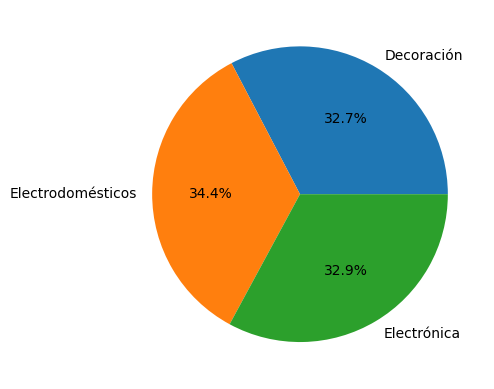

In [160]:
#grafico de torta % ingresos por categoria
grafico_categoria = df_producto.groupby("categoria")["ingreso_total"].sum()
grafico_categoria
plt.pie(grafico_categoria, labels=grafico_categoria.index, autopct="%1.1f%%")


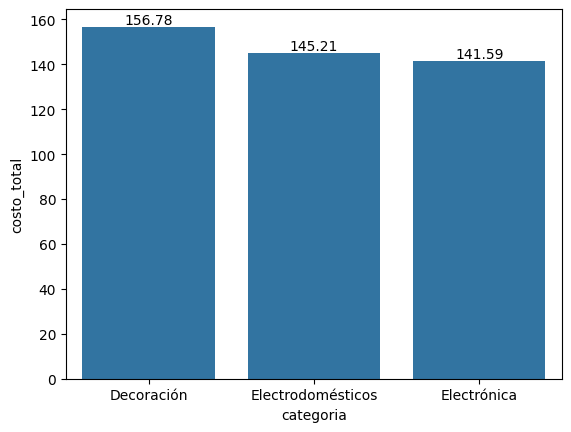

In [161]:
#grafico en seaborn por categoria y costo total
sns.barplot(x="categoria", y="costo_total", data=df_comparativo_cat)
#agregar etiquetas de datos
for i, v in enumerate(df_comparativo_cat["costo_total"]):
  plt.text(i, v, str(v), ha="center", va="bottom")

<Axes: xlabel='registro', ylabel='producto'>

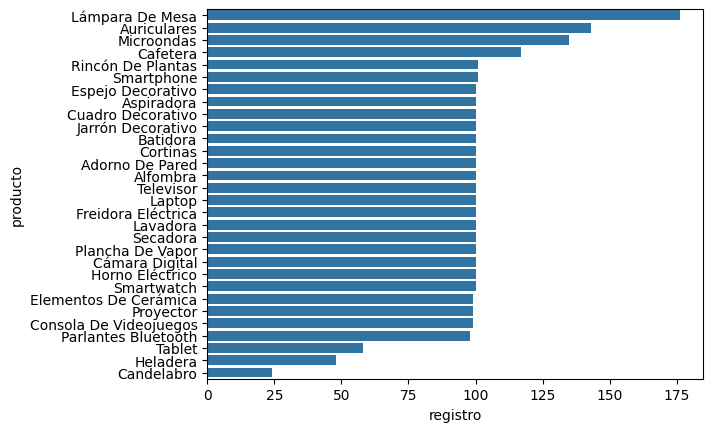

In [162]:
#grafica por registro y producto
sns.barplot(x="registro", y="producto", data=df_producto, orient="h", order=df_producto.sort_values(by="registro", ascending=False)["producto"])

Estadistica Descriptiva: Medidas de tendencia central- Dispersión-rango IQR- Outliers

In [163]:
#Medidas de tendencia central
promedio_ingreso = df_producto["ingreso_total"].mean()
promedio_costo = df_comparativo["costo_total"].mean()
promedio_ventas = df_producto["cantidad_total"].mean()
promedio_precio = df_producto["precio_promedio"].mean()

mediana_ingreso = df_producto["ingreso_total"].median()
mediana_costo = df_comparativo["costo_total"].median()
mediana_ventas = df_producto["cantidad_total"].median()
mediana_precio = df_producto["precio_promedio"].median()

print(f"Promedio ventas: {promedio_ingreso:.2f}")
print(f"Mediana ventas: {mediana_ingreso:.2f}")

print(f"Promedio costo: {promedio_costo:.2f}")
print(f"Mediana costo: {mediana_costo:.2f}")

print(f"Promedio cantidad vendida: {promedio_ventas:.2f}")
print(f"Mediana cantidad vendida: {mediana_ventas:.2f}")

print(f"Promedio precio: {promedio_precio:.2f}")
print(f"Mediana precio: {mediana_precio:.2f}")

Promedio ventas: 48903.12
Mediana ventas: 48140.24
Promedio costo: 14.79
Mediana costo: 14.62
Promedio cantidad vendida: 649.83
Mediana cantidad vendida: 635.50
Promedio precio: 75.18
Mediana precio: 74.75


In [164]:
#Mediadas de dispersión
rango_ingreso = df_producto["ingreso_total"].max() - df_producto["ingreso_total"].min()
rango_costo = df_comparativo["costo_total"].max() - df_comparativo["costo_total"].min()
rango_ventas = df_producto["cantidad_total"].max() - df_producto["cantidad_total"].min()
rango_precio = df_producto["precio_promedio"].max() - df_producto["precio_promedio"].min()

desv__ingreso = df_producto["ingreso_total"].std()
desv__costo = df_comparativo["costo_total"].std()
desv__ventas = df_producto["cantidad_total"].std()
desv__precio = df_producto["precio_promedio"].std()

print(f"Desviación Estándar de las ventas: {desv__ingreso:.2f}")
print(f"Desviación Estándar del costo: {desv__costo:.2f}")
print(f"Desviación Estándar de la cantidad vendida: {desv__ventas:.2f}")
print(f"Desviación Estándar del precio: {desv__precio:.2f}")


Desviación Estándar de las ventas: 13265.56
Desviación Estándar del costo: 1.64
Desviación Estándar de la cantidad vendida: 169.02
Desviación Estándar del precio: 2.32


In [165]:
#Rango intercuartilico del ingreso
q1 = df_producto["ingreso_total"].quantile(0.25)
q3 = df_producto["ingreso_total"].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)

Q1: 45601.92
Q3: 51092.96
IQR: 5491.040000000001


In [166]:
#Detección del Datos atipicos (Outliers) con IQR

"""Reglas: Límite inferior = Q1 − (1.5 × IQR)
Límite superior = Q3 + (1.5 × IQR)"""

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)

outliers = df_producto[(df_producto["ingreso_total"] < lim_inf) | (df_producto["ingreso_total"] > lim_sup)]
print("Outliers:", outliers)

Límite inferior: 37365.36
Límite superior: 59329.520000000004
Outliers:             categoria         producto  ingreso_total  cantidad_total  \
2          Decoración       Candelabro        11128.8             160   
8          Decoración  Lámpara De Mesa       82276.38            1112   
12  Electrodomésticos         Cafetera       59607.31             765   
14  Electrodomésticos         Heladera        25736.8             330   
17  Electrodomésticos       Microondas       72562.89             912   
20        Electrónica      Auriculares       74175.58             958   
28        Electrónica           Tablet       25856.57             374   

    precio_promedio  registro  
2         74.595417        24  
8         72.720625       176  
12        79.046581       117  
14        74.127708        48  
17        79.176000       135  
20        76.302727       143  
28        71.382586        58  


EDA-Analisis exploratorio de datos

<Axes: xlabel='costo_total', ylabel='ingreso_total'>

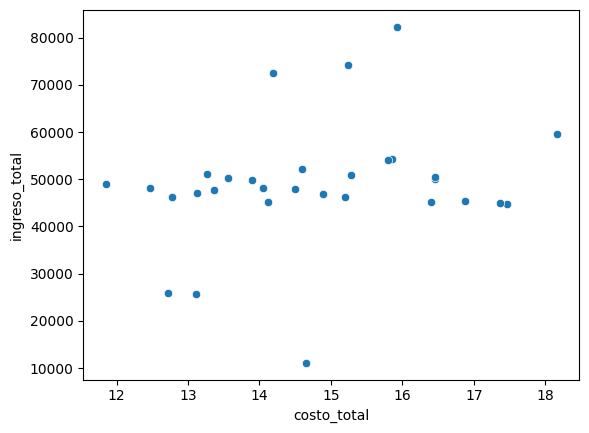

In [167]:
#Grafico de dispersion por producto en seaborn de registros (ventas) contra el costo promedio
sns.scatterplot(x="costo_total", y="ingreso_total", data=df_comparativo)

<Axes: xlabel='precio_promedio', ylabel='cantidad_total'>

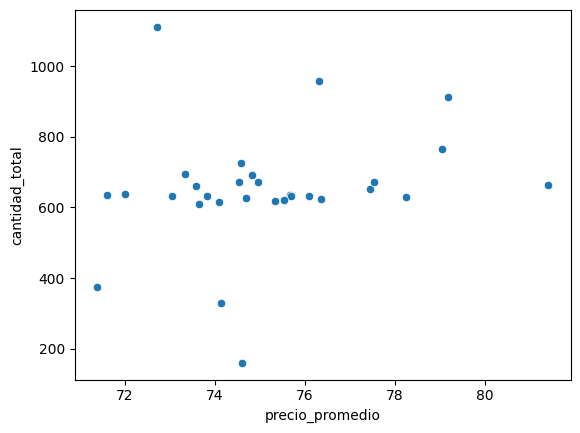

In [168]:
#Dispersion entre el precio y las ventas
sns.scatterplot(x="precio_promedio", y="cantidad_total", data=df_producto)

Correlaciones

In [169]:
#Coeficiente de correlación entre el costo total y el ingreso total
corr_costo_ingreso = df_comparativo["costo_total"].corr(df_comparativo["ingreso_total"])
print("Coeficiente de correlación entre costo total y ingreso total:", round(corr_costo_ingreso,2))

#Correlacion entre el precio promedio y las ventas
corr_precio_ventas = df_producto["precio_promedio"].corr(df_producto["cantidad_total"])
print("Coeficiente de correlación entre precio promedio y cantidad vendida:", round(corr_precio_ventas,2))

#Correlacion entre el costo_promedio y las ventas

df_for_corr = pd.DataFrame({
    'costo_total': df_comparativo['costo_total'],
    'cantidad_total': df_producto.set_index('producto')['cantidad_total']
})

corr_costo_ventas = df_for_corr["costo_total"].corr(df_for_corr["cantidad_total"])
print("Coeficiente de correlación entre costo total y cantidad vendida:", round(corr_costo_ventas,2))

Coeficiente de correlación entre costo total y ingreso total: 0.24
Coeficiente de correlación entre precio promedio y cantidad vendida: 0.22
Coeficiente de correlación entre costo total y cantidad vendida: 0.26


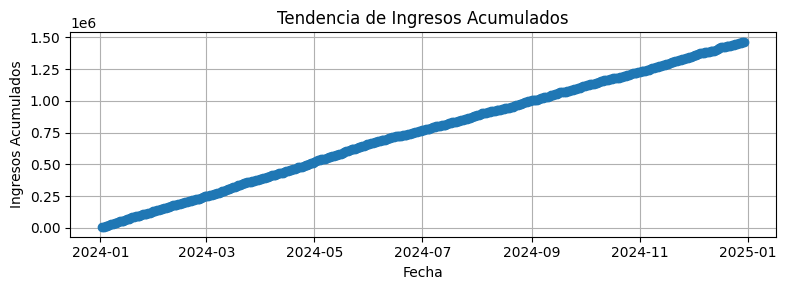

In [170]:
#Tendencia de los ingresos acumulados
# df_producto does not have a 'fecha' column. We will use ventas_2 for this.

# Agrupar ventas por fecha y sumar el ingreso
ventas_por_fecha = ventas_2.groupby("fecha_venta")["ingreso"].sum().sort_index()

# Calcular el acumulado de ingresos
ingresos_acumulados = ventas_por_fecha.cumsum()

# graficar tendencia de los ingresos acumulados
plt.figure(figsize=(8, 3))
plt.plot(ingresos_acumulados.index, ingresos_acumulados.values, marker='o', linestyle='-')
plt.xlabel("Fecha")
plt.ylabel("Ingresos Acumulados")
plt.title("Tendencia de Ingresos Acumulados")
plt.grid(True)
plt.tight_layout()
plt.show()

mes_venta
1     1741
2     1607
3     1792
4     1715
5     1812
6     1426
7     1547
8     1614
9     1576
10    1458
11    1625
12    1582
Name: cantidad, dtype: Int64


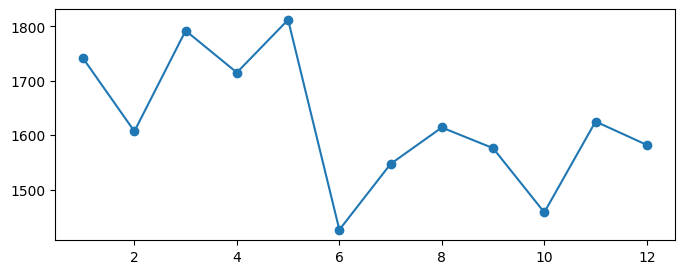

In [172]:
#identificar el mes con mas ventas y con menos ventas
ventas_2["fecha_venta"] = pd.to_datetime(ventas_2["fecha_venta"])
ventas_2["mes_venta"] = ventas_2["fecha_venta"].dt.month
ventas_por_mes = ventas_2.groupby("mes_venta")["cantidad"].sum()
print(ventas_por_mes)

#Graficar
plt.figure(figsize=(8, 3))
plt.plot(ventas_por_mes, marker='o', linestyle='-')

###Informe


---



Para el presente analisis de ventas de la compañia, se decide procesar la informacion recolectada del area comercial y del area de marketing a fin de analizar la gestion de cada area y como esta impacto en el mercado.

Para ello, se realiza un analisis exploratorio de cada conjunto de datos de manera individual y luego se concatenaran para integrar gestiones y profundizar en el análisis.

Es de señalar que lo anterior, se realizará mediante el analisis de datos en el lenguaje python a traves de la herramienta Colab. Donde a priori a fin de suminsitrar información de calidad y garantizar la misma,  se realizarán las transformaciones como la normalización de los tipos de datos y limpieza de datos pertinentes como identificacion y eliminacion o imputacion de duplicados segun sea el caso determinado por el analista, ademas de identificar informacion faltante, nula o erronea.

De esto se obtiene que:

La base de clientes cuenta con 567 registros, donde el análisis descriptivo permitió observar que la edad promedio de nuestros clientes es de 37 años con una desviación estándar de 10 años, donde todos son mayores de edad encontrándose como edad mínima 20 años y máxima 81, con ingresos en promedio de $34.668 con una desviación de 12.974. Por su parte, el análisis estadístico de la información suministrada por el equipo de marketing, mostró que de las 90 campañas realizadas el costo promedio fue de 4,92 y el máximo de 7.39.
Con respecto a las ventas, la compañía registro un total de 3.035 en el periodo analizado, donde la venta promedio fue de 6.5 unidades con una desviación de 3.4 y una máxima de 12.

En referencia a la información faltante, en las ventas se registraron dos unidades sin precio y cantidad y se identificaron 70 registros duplicados, los cuales fueron eliminados. Quedando un total de 2998 registros de ventas.
Así mismo, normalizados y transformados los datos donde se agregó a su vez la variable ingreso de las ventas. Se refiere en un balance general de la compañía que en el periodo analizado, el ingreso de las ventas fue de 1.467.093 con un costo total en campañas de marketing de 443 y un ingreso promedio de  489 logrando un total de unidades vendidas de 19.495 con un precio promedio de  75.

De igual forma, el promedio de ventas fue de 48903 y el promedio cantidad vendida fue de 649.83 donde el producto más vendido fue la “Lampara de Mesa” y el menos “El Candelabro”.

Este informe, hace un foco en las ventas por categoría reflejando que Decoración y Electrodomésticos presento el mismo numero de unidades vendidas. Sin embargo, la categoría 505.299 registro el mayor ingreso (34,4%), teniendo en cuenta sus precios promedio, los cuales tienden a ser mayores.

Este análisis también permitió identificar que el comportamiento del ingreso total de ventas no presenta una relación fuerte con el costo total en marketing, si bien esta es positiva no es fuerte (0,24), al igual que la relación entre el precio promedio y las unidades vendidas la cual es de 0,22.
Finalmente, es de señalar que en el primer semestre del años las ventas fueron mas altas que en el segundo, siendo junio el mes con menos numero de ventas, seguido por el mes de octubre, registrando una leve recuperación en los dos últimos meses de año.


